In [1]:
# coding: utf-8
__author__ = "Nicholas Metherall"
__copyright__ = "Copyright 2025, The Pacific Community (SPC)"
__license__ = "CreativeCommons"
__version__ = "0.1"
__email__ = "nicholasm@spc.int"
__status__ = "Development"

import os
os.environ['USE_PYGEOS'] = '0'
import pandas as pd
import geopandas as gpd
import numpy as np
from fiona.crs import from_epsg
import shapely
import warnings
from shapely.ops import unary_union
from shapely.geometry import box
warnings.filterwarnings('ignore')
# coastal ndti

<Axes: >

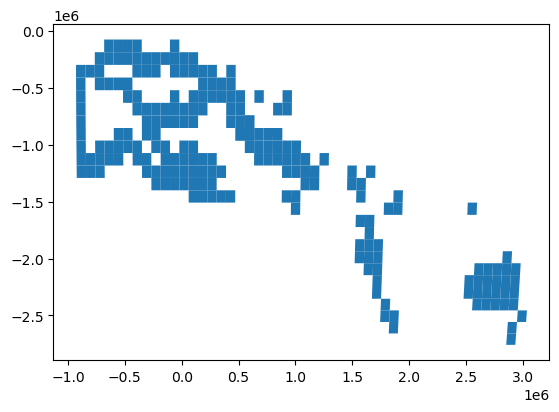

In [2]:
coastline_lines = gpd.read_file("coastline_lines.geojson")
coastal_grids = gpd.read_file("coastal_macblue_grids.geojson")
coastal_grids.plot()

In [3]:
coastal_grids

,level_1,GID_0,COUNTRY,index,uuid,index_right,geometry
0,16,FJI,Fiji,1,FJI1,0,"POLYGON ((2853497.38 -2758834.497, 2860754.992..."
1,17,VUT,Vanuatu,2,VUT2,0,"POLYGON ((1820480.449 -2658691.923, 1824951.85..."
2,17,FJI,Fiji,3,FJI3,0,"POLYGON ((2860754.992 -2658691.923, 2867781.49..."
3,18,VUT,Vanuatu,4,VUT4,0,"POLYGON ((1744734.194 -2557719.247, 1748864.58..."
4,18,VUT,Vanuatu,5,VUT5,0,"POLYGON ((1824951.858 -2557719.247, 1829272.15..."
...,...,...,...,...,...,...,...
201,40,PNG,Papua New Guinea,225,PNG225,0,"POLYGON ((-681479.65 -185890.359, -681566.064 ..."
202,40,PNG,Papua New Guinea,226,PNG226,0,"POLYGON ((-598876.056 -185890.359, -598951.995..."
203,40,PNG,Papua New Guinea,227,PNG227,0,"POLYGON ((-516272.462 -185890.359, -516337.927..."
204,40,PNG,Papua New Guinea,228,PNG228,0,"POLYGON ((-433668.868 -185890.359, -433723.859..."


In [16]:
from shapely.geometry import box

def sixtyfourths(grid):
    minx, miny, maxx, maxy = grid.bounds
    width = (maxx - minx) / 10
    height = (maxy - miny) / 10
    result = []
    idx = 1
    for i in range(8):
        for j in range(8):
            x1 = minx + i * width
            x2 = minx + (i + 1) * width
            y1 = miny + j * height
            y2 = miny + (j + 1) * height
            result.append((box(x1, y1, x2, y2), f'Q{idx}'))
            idx += 1
    return result

# Build a list of dicts for each sub-square
records = []
for idx, row in coastal_grids.iterrows():
    for geom, sixtyfourth_name in sixtyfourths(row.geometry):
        rec = row.to_dict()
        rec['geometry'] = geom
        rec['sixtyfourth'] = sixtyfourth_name
        records.append(rec)

sixtyfourths_gdf = gpd.GeoDataFrame(records, crs=coastal_grids.crs)

In [17]:
sixtyfourths_gdf['quid'] = sixtyfourths_gdf['uuid']+sixtyfourths_gdf['sixtyfourth']+'_'+sixtyfourths_gdf['level_1'].astype(str)

In [18]:
sixtyfourths_gdf

,level_1,GID_0,COUNTRY,index,uuid,index_right,geometry,sixtyfourth,quid
0,16,FJI,Fiji,1,FJI1,0,"POLYGON ((2862225.253 -2758834.497, 2862225.25...",Q1,FJI1Q1_16
1,16,FJI,Fiji,1,FJI1,0,"POLYGON ((2862225.253 -2748820.24, 2862225.253...",Q2,FJI1Q2_16
2,16,FJI,Fiji,1,FJI1,0,"POLYGON ((2862225.253 -2738805.983, 2862225.25...",Q3,FJI1Q3_16
3,16,FJI,Fiji,1,FJI1,0,"POLYGON ((2862225.253 -2728791.725, 2862225.25...",Q4,FJI1Q4_16
4,16,FJI,Fiji,1,FJI1,0,"POLYGON ((2862225.253 -2718777.468, 2862225.25...",Q5,FJI1Q5_16
...,...,...,...,...,...,...,...,...,...
13179,40,PNG,Papua New Guinea,229,PNG229,0,"POLYGON ((-37174.236 -152433.108, -37174.236 -...",Q60,PNG229Q60_40
13180,40,PNG,Papua New Guinea,229,PNG229,0,"POLYGON ((-37174.236 -141280.691, -37174.236 -...",Q61,PNG229Q61_40
13181,40,PNG,Papua New Guinea,229,PNG229,0,"POLYGON ((-37174.236 -130128.274, -37174.236 -...",Q62,PNG229Q62_40
13182,40,PNG,Papua New Guinea,229,PNG229,0,"POLYGON ((-37174.236 -118975.857, -37174.236 -...",Q63,PNG229Q63_40


In [19]:
# Collect all new rows as dicts
records = []
for idx, row in sixtyfourths_gdf.iterrows():
    for geom, sixtyfourth_name in sixtyfourths(row.geometry):
        rec = row.to_dict()
        rec['geometry'] = geom
        rec['sixtyfourths'] = sixtyfourth_name  # Optional: label the sixtyfourth
        records.append(rec)

sixtyfourths_gdf = gpd.GeoDataFrame(records, crs=coastal_grids.crs)

<Axes: >

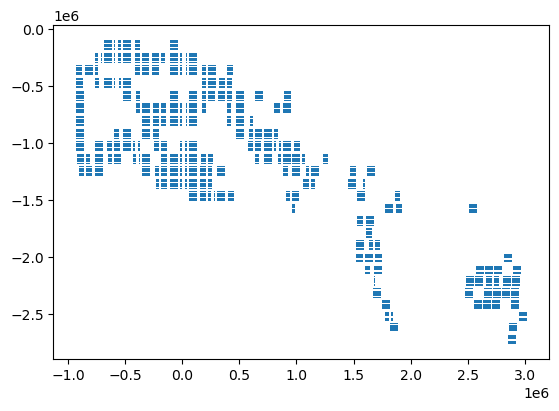

In [20]:
sixtyfourths_gdf.plot()

In [21]:
sixtyfourths_gdf

,level_1,GID_0,COUNTRY,index,uuid,index_right,geometry,sixtyfourth,quid,sixtyfourths
0,16,FJI,Fiji,1,FJI1,0,"POLYGON ((2854370.167 -2758834.497, 2854370.16...",Q1,FJI1Q1_16,Q1
1,16,FJI,Fiji,1,FJI1,0,"POLYGON ((2854370.167 -2757833.072, 2854370.16...",Q1,FJI1Q1_16,Q2
2,16,FJI,Fiji,1,FJI1,0,"POLYGON ((2854370.167 -2756831.646, 2854370.16...",Q1,FJI1Q1_16,Q3
3,16,FJI,Fiji,1,FJI1,0,"POLYGON ((2854370.167 -2755830.22, 2854370.167...",Q1,FJI1Q1_16,Q4
4,16,FJI,Fiji,1,FJI1,0,"POLYGON ((2854370.167 -2754828.794, 2854370.16...",Q1,FJI1Q1_16,Q5
...,...,...,...,...,...,...,...,...,...,...
843771,40,PNG,Papua New Guinea,229,PNG229,0,"POLYGON ((-38826.57 -104477.715, -38826.57 -10...",Q64,PNG229Q64_40,Q60
843772,40,PNG,Papua New Guinea,229,PNG229,0,"POLYGON ((-38826.57 -103362.474, -38826.57 -10...",Q64,PNG229Q64_40,Q61
843773,40,PNG,Papua New Guinea,229,PNG229,0,"POLYGON ((-38826.57 -102247.232, -38826.57 -10...",Q64,PNG229Q64_40,Q62
843774,40,PNG,Papua New Guinea,229,PNG229,0,"POLYGON ((-38826.57 -101131.99, -38826.57 -100...",Q64,PNG229Q64_40,Q63


In [22]:
# Remove index_right if it exists
if 'index_right' in sixtyfourths_gdf.columns:
    sixtyfourths_gdf = sixtyfourths_gdf.drop(columns='index_right')

if 'index_right' in coastline_lines.columns:
    coastline_lines = coastline_lines.drop(columns='index_right')

<Axes: >

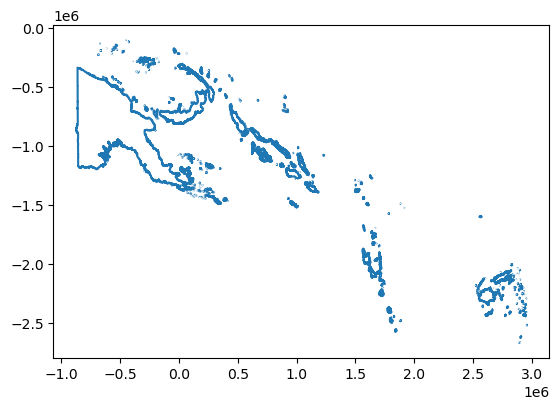

In [23]:
coastline_lines.plot()

In [24]:
# Only keep grids that intersect with any coastline
coastline_lines = gpd.read_file("coastline_lines.geojson")

subset = gpd.sjoin(sixtyfourths_gdf, coastline_lines, how="inner", predicate="intersects")


In [25]:
subset

,level_1,GID_0,COUNTRY,index,uuid,geometry,sixtyfourth,quid,sixtyfourths,index_right
10489,17,FJI,Fiji,3,FJI3,"POLYGON ((2902632.19 -2627390.394, 2902632.19 ...",Q36,FJI3Q36_17,Q58,0
10490,17,FJI,Fiji,3,FJI3,"POLYGON ((2902632.19 -2626380.667, 2902632.19 ...",Q36,FJI3Q36_17,Q59,0
10491,17,FJI,Fiji,3,FJI3,"POLYGON ((2902632.19 -2625370.94, 2902632.19 -...",Q36,FJI3Q36_17,Q60,0
10492,17,FJI,Fiji,3,FJI3,"POLYGON ((2902632.19 -2624361.213, 2902632.19 ...",Q36,FJI3Q36_17,Q61,0
10493,17,FJI,Fiji,3,FJI3,"POLYGON ((2902632.19 -2623351.486, 2902632.19 ...",Q36,FJI3Q36_17,Q62,0
...,...,...,...,...,...,...,...,...,...,...
843364,40,PNG,Papua New Guinea,229,PNG229,"POLYGON ((-41305.07 -170276.975, -41305.07 -16...",Q58,PNG229Q58_40,Q37,0
843372,40,PNG,Papua New Guinea,229,PNG229,"POLYGON ((-40478.903 -170276.975, -40478.903 -...",Q58,PNG229Q58_40,Q45,0
843380,40,PNG,Papua New Guinea,229,PNG229,"POLYGON ((-39652.736 -170276.975, -39652.736 -...",Q58,PNG229Q58_40,Q53,0
843387,40,PNG,Papua New Guinea,229,PNG229,"POLYGON ((-38826.57 -171392.217, -38826.57 -17...",Q58,PNG229Q58_40,Q60,0


<Axes: >

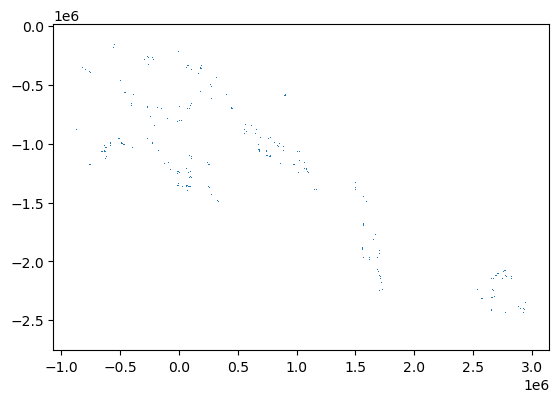

In [26]:
subset.plot()

In [27]:
sixtyfourth_grids = subset
sixtyfourth_grids.to_file("sixtyfourth_grids.geojson")
